데이터 전처리

올바른 결과 도출을 위해서 데이터를 사용하기 전에 데이터 전처리 과정을 거침

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
# numpy의 column_stack() 함수는 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결
# ex)
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [5]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [ ]:
# np.one(), np.zero() 함수 이용해서 타깃 생성하기

# np.concatenate() 함수 = 첫 번째 차원을 따라 배열 연결 하는 함수

In [7]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [ ]:
# 사이킷런으로 훈련 테스트와 테스트 세트 나누기

# train_test_split() 함수  >> 설정한 비율에 맞게 나눠주고 알아서 섞어줌! 기본적으로 25퍼센트 비율

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target,
                                                        random_state=42)

In [10]:
# 비율이 맞게 잘 나누어졌는지 확인하기 위해 shape 속성 사용
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


In [11]:
print(test_target)

# 10개가 도미 3개가 빙어 >> 빙어의 비율이 전체 데이터의 비율에 비해 조금 모자름.
# 약간의 샘플링 편향 문제

# 무작위로 데이터를 나누면 샘플이 골고루 섞이지 않을 수 있음.

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [12]:
# 해결방법 stratify!!  타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눔
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target,
                                                            stratify=fish_target, random_state=42)

In [13]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [14]:
# k-최근접 이웃 훈련

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [15]:
# 이상치 도미 데이터 확인
# 도미로 나오지 않고 빙어로 나옴

print(kn.predict([[25,150]]))

[0.]


c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


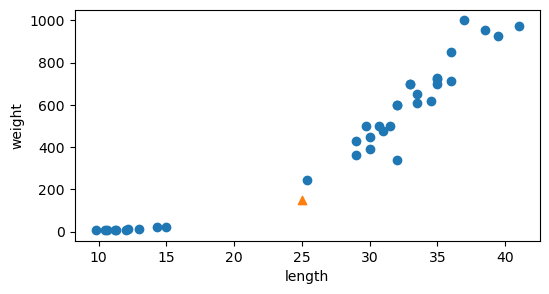

In [16]:
# 이상치 도미 데이터 산점도로 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [19]:
# 샘플이 오른쪽 위로 뻗어 있는 도미 데이터에 더 가까운데 빙어 데이터에 가깝다고 판단함

# K-최근접 이웃은 주변 샘플들 중 다수인 클래스를 예측으로 사용함

# >> 이웃까지의 거리를 인텍스로 반환해주는 메서드 kneighbors()

distances, indexes = kn.kneighbors([[25,150]])

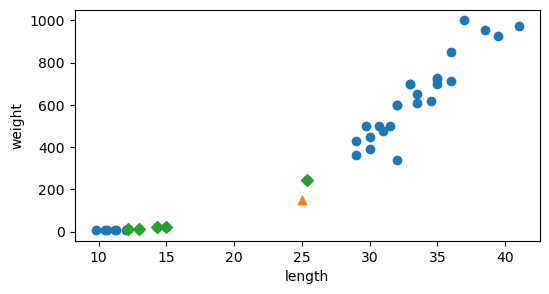

In [20]:
plt.figure(figsize=(6,3))
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D') #'D' 산점도 마름모로 그림
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [21]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [22]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [23]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


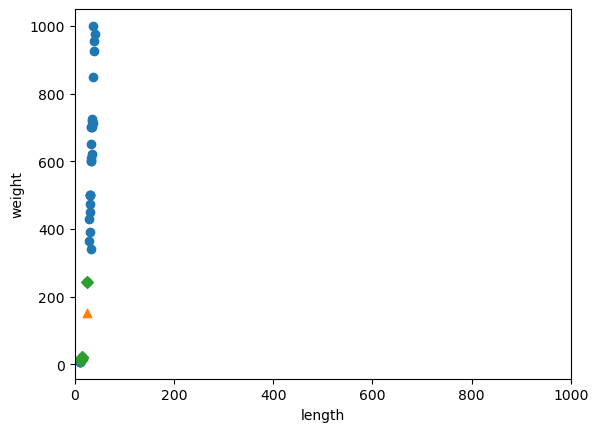

In [24]:
# 숫자에 비해 그래프에 나타난 거리 비율이 이상함 x축에 비해 y축의 범위가 넓음

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker= '^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker= 'D')
plt.xlim(0,1000)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 이렇게 두 특성(길이와 무게)의 값이 놓인 범위가 다를 때
# 두 특성의 '스케일'(scale)이 다르다고 말함

In [ ]:
# 데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측하기 힘듦
# 이런 알고리즘들은 샘플간의 거리에 영향을 많이 받기 때문에 제대로 사용하기 위해서는 
# 특성값을 일정한 기준으로 맞춰 주어야 함.

# >> 데이터 전처리<< 라고 함.

전처리

### 전처리 방법 :  표준점수(standard scone)
    - 표준점수는 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타냄.
    - 이를 통해 실제 특성값의 크기와 상관없이 동일한 조건으로 비교 가능

In [25]:
# 계산 방법 : 평균을 빼고 표준편차를 나누어 줌

# numpy 계산 함수

mean = np.mean(train_input, axis=0)  # np.mean() 평균
std = np.std(train_input, axis=0)  # np.std() 표준편차 

# 각 특성별로 계산해야 하기 떄문에 각 열의 통계 값 axis=0



In [26]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [27]:
# 원본 데이터에서 평균을 빼고 표준편차로 나누어 표준점수 반환
train_scaled = (train_input - mean) / std

In [ ]:
# 브로드 캐스팅(Broadcasting)

# numpy는 train_input의 모든 행에서 mean에 있는 두 평균값을 빼주고 std에 있는 두 표준편차를 모든 행에 적용해줌.
# 브로드 캐스팅은 배열 사이에서 일어남

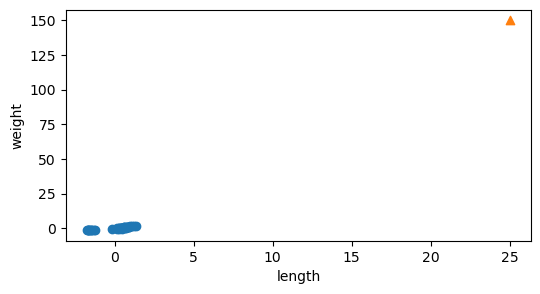

In [28]:
# 전처리 데이터로 모델 훈련

plt.figure(figsize=(6,3))
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25,150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#  >> 나머지는 표준점수를 반환해서 넣어줬는데 25,150 값은 그냥 넣어줘서 이상하게 나옴

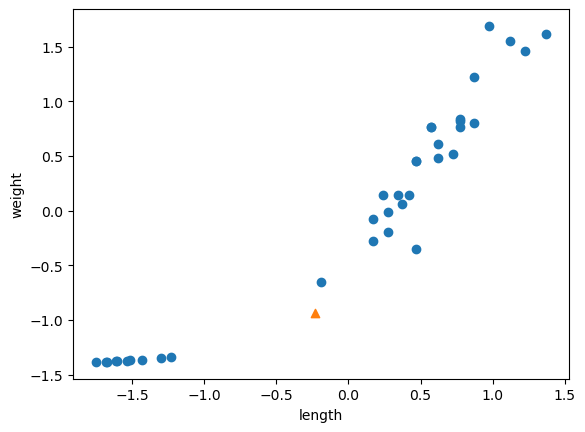

In [30]:
# 예측할 데이터도 반환하여 사용

new = ([25,150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 모양은 표준편차로 변환하기 전의 산점도와 비슷하지만 x축과 y축의 범위가 -1.5에서 1.5 사이로 바뀜

In [31]:
kn.fit(train_scaled,train_target)

KNeighborsClassifier()

In [ ]:
# 변환된 데이터로 훈련했으니
# 테스트 데이터도 변환하여 검증 score 해봐야 함.

In [32]:
test_scaled = (test_input - mean) / std

In [33]:
kn.score(test_scaled,test_target)

c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [34]:
kn.predict([new])

# 이번에는 1 도미로 예측하는 것을 확인할 수 있음

c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1.])

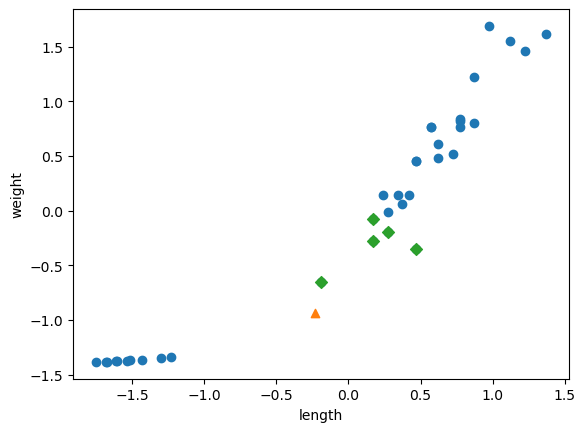

In [35]:
# kneighbors() 함수로 샘플의 k-최근접 이웃을 구한 다음 산점도 표시하기

distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# **키워드 핵심**

# ** 데이터 전처리 : 머신러닝 모델에 훈련 데이터를 주입하기 전에 가공하는 단계
#   (때로는 전처리에 많은 시간이 소모되기도 함)
# ** 표준점수 : 훈련 세트의 스케일을 바꾸는 대표적인 방법 중 하나.
#   표준점수를 얻으려면 특성의 평균을 빼고 표준편차로 나눔.
#   !! 반드시 !! 훈련 세트의 평균과 표준 편차로 테스트 세트를 바꿔야 함
# ** 브로드캐스팅 : 크기가 다른 넘파이 배열에서 자동으로 사칙 연산을 모든 행이나 열로 확장하여 수행하는 기능

In [ ]:
# ** 핵심 패키지 함수**

# ** train_test_split() 훈련 데이터를 훈련 세트와 테스트 세트로 나누는 함수
#   여러 개의 배열 전달
#   테스트 세트로 나눌 비율 test_size 매개변수로 지정 가능하고 지정값 0.25

#   shuffle은 매개변수로 훈련세트와 테스트 세트로 나누기 전에 무작위로 섞을지 여부 결정
#   기본값=True

#   stratify 매개변수에 클래스 레이블이 담긴 배열(일반적으로 타깃 배열, y값)을 전달하면
#   클래스 비율에 맞게 훈련 세트와 테스트 세트를 나눔

# **kneighbors()는 k-최근접 이웃 객체의 메서드
#   입력한 데이터가 가장 가까운 이웃을 찾아 이웃 샘플의 인덱스를 반환
#   기본적으로 이웃의 개수는 KNeighborsClassifier 클래스의 객체를 생성할 때 지정한 개수 사용
#   >> n_neighbors 매개변수로 다르게 지정 가능

#   return_distance 매개변수를 False로 지정하면 이웃 샘플의 인덱스만 반환하고 거리는
#   반환하지 않음. 
#   기본값 = True

확인 문제

In [ ]:
1. 이 방식은 스케일 조정 방식의 하나로 특성값을 0에서 표준편차의 몇 배수만큼 떨어져 있는지로
반환한 값

>>>>> 표준점수  <<<<<

원점수 : 변환하지 않은 원래 점수
사분위수 : 데이터를 크기 순서대로 늘어 놓았을때 4등분 하는 수

In [ ]:
2. 테스트 세트의 스케일을 조정하려고 함. 다음 중 어떤 데이터의 통계 값을 사용해야 하는지

.스케일 조정?? 훈련 세트통계값 사용해야죠